# 1. Authenticate to Twitter

In [ ]:
!pip install tweepy # Install the tweepy library to interact with the Twitter API

In [2]:
import numpy as np
import pandas as pd
import tweepy as tw  # Import tweepy for Twitter API
from matplotlib import pyplot as plt

In [3]:
consumer_key = ''  # Enter your Twitter API consumer key
consumer_secret = ''  # Enter your Twitter API consumer secret
access_token = ''  # Enter your Twitter API access token
access_token_secret = ''  # Enter your Twitter API access token secret

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) # Authenticate
auth.set_access_token(access_token, access_token_secret) # Set Tokens
api = tw.API(auth, wait_on_rate_limit=True) # Instantiate API

# 2. Get Tweets

In [ ]:
hashtag = "#AvengersEndgame"
query = tw.Cursor(api.search_tweets, q=hashtag).items(15000) # Retrieve up to 15,000 tweets containing the hashtag
tweets = [{'tweets':tweet.text, 'timestamp':tweet.created_at} for tweet in query] # Create a list of dictionaries containing the tweet text and timestamp
print(tweets[0])

In [7]:
df = pd.DataFrame.from_dict(tweets) # Convert the list of dictionaries to a pandas DataFrame
df.head() # Display the first few rows of the DataFrame

,tweets,timestamp
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...,2019-04-23 10:43:30
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201...",2019-04-23 10:43:30
2,saving these bingo cards for tomorrow \n©\n #A...,2019-04-23 10:43:30
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:29
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",2019-04-23 10:43:29


In [8]:
import datetime

# Get minimum and maximum dates from the retrieved tweets
min_date = pd.to_datetime(df['timestamp'].min())
max_date = pd.to_datetime(df['timestamp'].max())

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2019-04-23 10:00:00
Maximum date: 2019-04-23 09:59:59


In [9]:
# Define variations of cast member names
cast_member_variations = {
    "Iron Man": ["Iron Man", "Ironman", "Tony Stark", "Robert Downey Jr.", "Robert", "Downey", "Jr"],
    "Captain America": ["Captain America", "CaptainAmerica", "Cap", "Steve Rogers", "Chris Evans", "Chris", "Evans"],
    "Thor": ["Thor", "Chris Hemsworth", "Chris", "Hemsworth"],
    "Black Widow": ["Black Widow", "Blackwidow", "Natasha Romanoff", "Scarlett Johansson", "Scarlett", "Johansson"],
    "Hulk": ["Hulk", "Bruce Banner", "Mark Ruffalo", "Mark", "Ruffalo"],
    "Hawkeye": ["Hawkeye", "Clint Barton", "Jeremy Renner", "Jeremy", "Renner"],
    "Black Panther": ["Black Panther", "Blackpanther", "T'Challa", "Chadwick Boseman", "Chadwick", "Boseman"],
    "Captain Marvel": ["Captain Marvel", "Captainmarvel", "Carol Danvers", "Brie Larson", "Brie", "Larson"],
    "Thanos": ["Thanos", "The Mad Titan", "Josh Brolin", "Josh", "Brolin"]
}

# 3. Preprocess

In [10]:
# Import necessary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords  # Import stopwords
from textblob import Word, TextBlob  # Import textblob

In [ ]:
nltk.download('stopwords')  # Download stopwords corpus
nltk.download('wordnet')    # Download wordnet corpus
stop_words = stopwords.words('english')  # Get the list of English stopwords
custom_stopwords = ['RT', '#AvengersEndgame']  # Define additional custom stopwords

In [12]:
import re  # Import the re module for regular expressions

# Function to preprocess tweets
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet = re.sub(r"http\S+", "", processed_tweet)  # Remove URLs
    processed_tweet = re.sub(r"@(\w+)", "\\1", processed_tweet) # Remove @ symbol
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)  # Remove stopwords
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords) # Remove custom stopwords
    processed_tweet = re.sub(r"[^\w\s]","", processed_tweet)  # Remove punctuation
    processed_tweet = re.sub(r"#(\w+)", r"\1", processed_tweet)  # Remove hashtag symbol
    processed_tweet = processed_tweet.lower()  # Convert to lowercase
    return(processed_tweet)

df['Processed Tweet'] = df['tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords)) # Apply preprocessing to tweets
df['Processed Tweet'][:10] # Display the first 10 processed tweets

0                        mrvelstan literally nobody me
1    agntecarter im emotional sorry 2014 x 2019 bla...
2                         saving bingo cards tomorrow 
3                         helloboon man ads everywhere
4       marvel we salute you chrisevans captainamerica
5    mcu_direct the first nonspoiler critic reactio...
6    renner4real ready rock  excited avengersendgam...
7             avengers were til end line wintersoldier
8    variety first reactions most emotional epic mc...
9                         helloboon man ads everywhere
Name: Processed Tweet, dtype: object

In [13]:
# Function to identify if a tweet mentions a specific cast member
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref.lower()) != -1:
            flag = 1
    return flag

# Create columns to identify tweets mentioning each cast member
df['Iron Man'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Iron Man'])) 
df['Captain America'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Captain America']))
df['Thor'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Thor'])) 
df['Black Widow'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Black Widow'])) 
df['Hulk'] = df['tweets'].apply(lambda x: identify_subject(x, cast_member_variations['Hulk'])) 
df['Hawkeye'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Hawkeye'])) 
df['Black Panther'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Black Panther'])) 
df['Captain Marvel'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Captain Marvel'])) 
df['Thanos'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Thanos'])) 

df.head(10) # Display the first 10 rows of the DataFrame with cast member flags

,tweets,timestamp,Processed Tweet,Iron Man,Captain America,Thor,Black Widow,Hulk,Hawkeye,Black Panther,Captain Marvel,Thanos
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...,2019-04-23 10:43:30,mrvelstan literally nobody me,0,0,0,0,0,0,0,0,0
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201...",2019-04-23 10:43:30,agntecarter im emotional sorry 2014 x 2019 bla...,0,1,0,1,0,0,0,0,0
2,saving these bingo cards for tomorrow \n©\n #A...,2019-04-23 10:43:30,saving bingo cards tomorrow,0,0,0,0,0,0,0,0,0
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:29,helloboon man ads everywhere,0,0,0,0,0,0,0,0,0
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",2019-04-23 10:43:29,marvel we salute you chrisevans captainamerica,0,1,1,0,0,0,0,0,0
5,RT @MCU_Direct: The first NON-SPOILER #Avenger...,2019-04-23 10:43:29,mcu_direct the first nonspoiler critic reactio...,0,0,0,0,0,0,0,0,0
6,RT @Renner4Real: Ready to rock ! #excited #...,2019-04-23 10:43:28,renner4real ready rock excited avengersendgam...,0,0,0,0,0,1,0,0,0
7,RT @Avengers: We’re with him ‘til the end of t...,2019-04-23 10:43:28,avengers were til end line wintersoldier,0,0,0,0,0,0,0,0,0
8,RT @Variety: #AvengersEndgame first reactions:...,2019-04-23 10:43:27,variety first reactions most emotional epic mc...,0,0,0,0,0,0,0,0,0
9,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:26,helloboon man ads everywhere,0,0,0,0,0,0,0,0,0


In [14]:
# Print an example of the original and processed tweet
print('Base review\n', df['tweets'][4])
print('\n------------------------------------\n')
print('Cleaned review\n', df['Processed Tweet'][4]) 

Base review
 RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm

------------------------------------

Cleaned review
 marvel we salute you chrisevans captainamerica


# 4. Calculate Sentiment

In [15]:
import numpy as np  # Import numpy for numerical operations

In [16]:
# Calculate polarity and subjectivity scores for each tweet
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'polarity', 'subjectivity']].tail(10)  # Display the last 10 rows with processed tweets, polarity, and subjectivity

,Processed Tweet,polarity,subjectivity
14990,itsjustanx elizabeth olsen looks absolutely st...,0.500,1.00
14991,nikkietutorials reason number 7241 stan brie l...,0.000,0.00
14992,marvel elizabeth olsen bringing magicu2728 sca...,0.000,0.00
14993,cobiesmulders ooooooh guys its good,0.700,0.60
14994,marvel_ffightus we take fight back him win mar...,0.400,0.20
14995,natsdany first time last time avengers avenger...,0.125,0.20
14996,mtvnews the cast seen lot years figured could ...,-0.400,0.40
14997,spicinemas kindly announce approximate timings...,0.100,0.75
14998,marvel we salute you chrisevans captainamerica,0.000,0.00
14999,avengers welcome party robertdowneyjr ironman,0.800,0.90


In [17]:
cast_members = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk', 'Hawkeye', 'Black Panther', 'Captain Marvel', 'Thanos']

In [18]:
# Function to analyze sentiment for a specific cast member
def analyze_cast_sentiment(df, cast_member):
    cast_tweets = df[df[cast_member]==1] # Filter tweets mentioning the cast member
    sentiment_data = cast_tweets[['polarity', 'subjectivity']].describe()  # Calculate descriptive statistics for sentiment
    return sentiment_data

# Analyze sentiment for each cast member and store the results in a dictionary
cast_sentiment_data = {}
for cast_member in cast_members:
      cast_sentiment_data[cast_member] = analyze_cast_sentiment(df.copy(), cast_member)
        
print(cast_sentiment_data['Iron Man']) # Print the sentiment data for Iron Man

          polarity  subjectivity
count  1200.000000   1200.000000
mean      0.567740      0.494690
std       0.363498      0.350109
min      -0.400000      0.000000
25%       0.000000      0.362500
50%       0.800000      0.400000
75%       0.800000      0.900000
max       1.000000      1.000000


# 5. Visualise

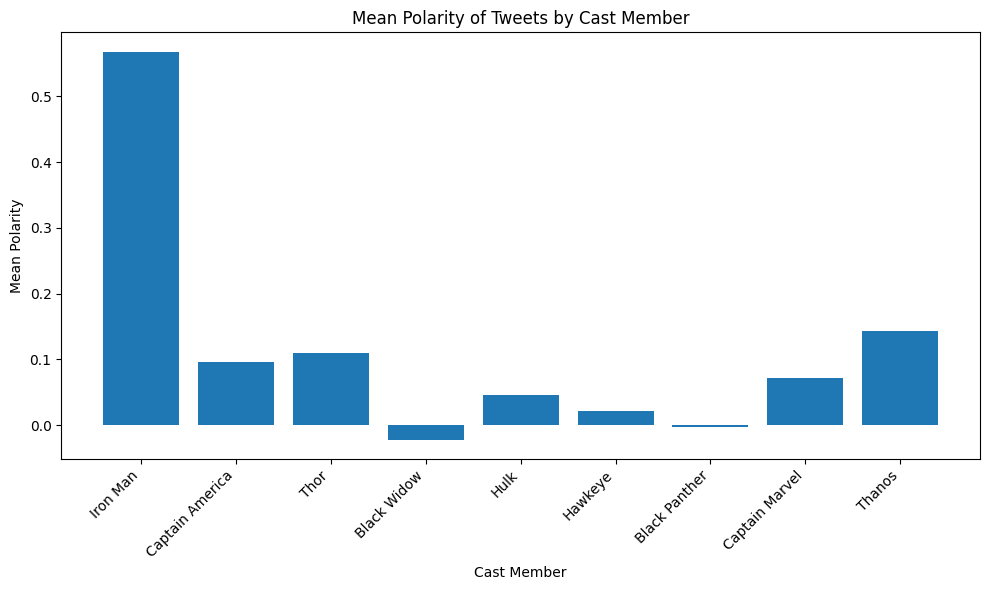

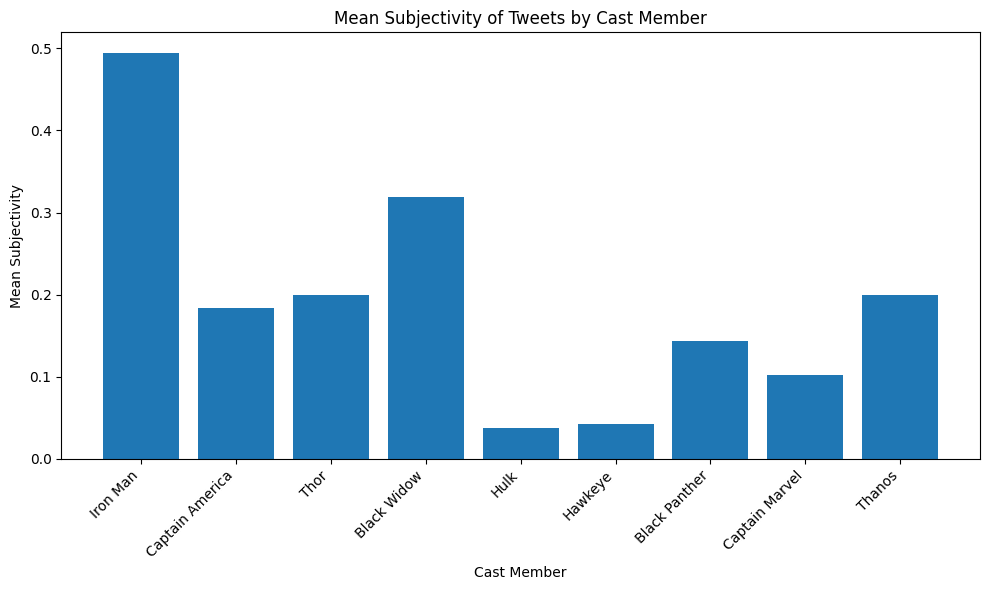

In [19]:
import matplotlib.pyplot as plt # Import matplotlib for data visualization

mean_polarity = {cast_member: cast_sentiment_data[cast_member]['polarity']['mean'] for cast_member in cast_members} # Calculate mean polarity for each cast member

# Create a bar chart for mean polarity by cast member
plt.figure(figsize=(10, 6))
plt.bar(mean_polarity.keys(), mean_polarity.values())
plt.xlabel('Cast Member')
plt.ylabel('Mean Polarity')
plt.title('Mean Polarity of Tweets by Cast Member')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

mean_subjectivity = {cast_member: cast_sentiment_data[cast_member]['subjectivity']['mean'] for cast_member in cast_members} # Calculate mean subjectivity for each cast member

# Create a bar chart for mean subjectivity by cast member
plt.figure(figsize=(10, 6))
plt.bar(mean_subjectivity.keys(), mean_subjectivity.values())
plt.xlabel('Cast Member')
plt.ylabel('Mean Subjectivity')
plt.title('Mean Subjectivity of Tweets by Cast Member')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

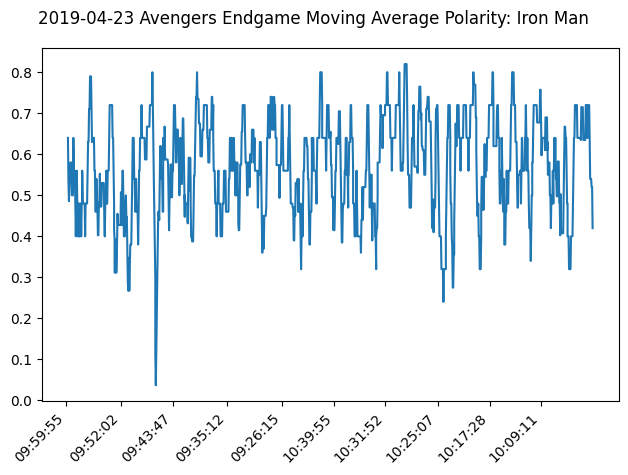

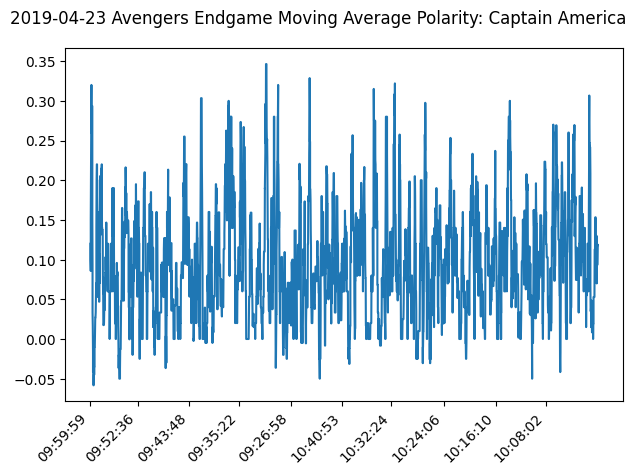

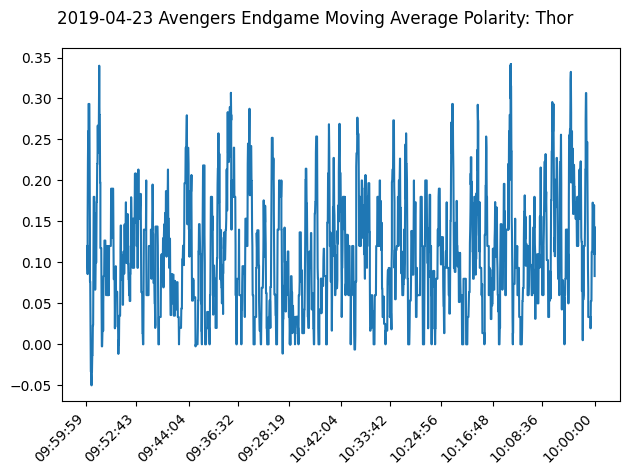

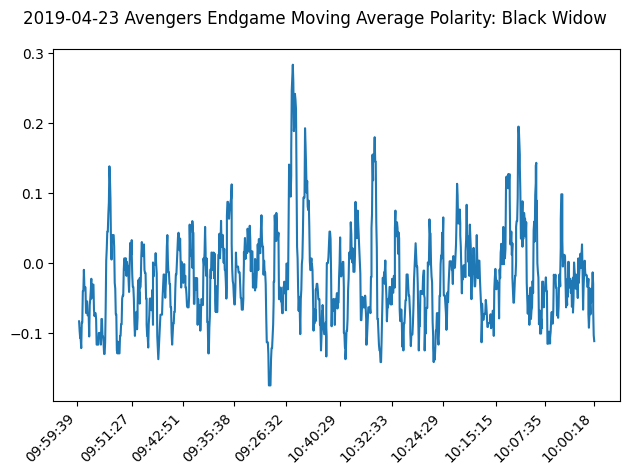

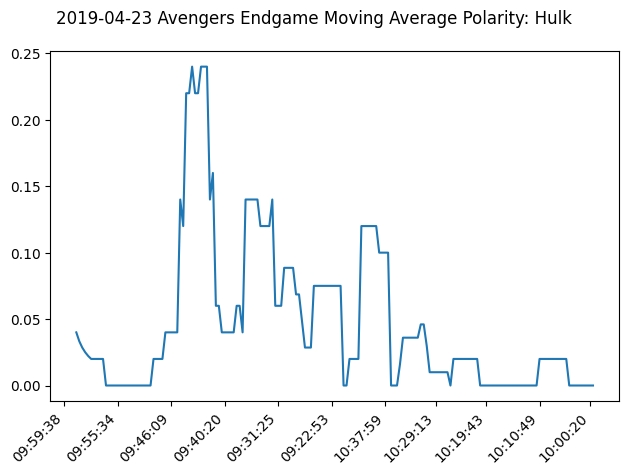

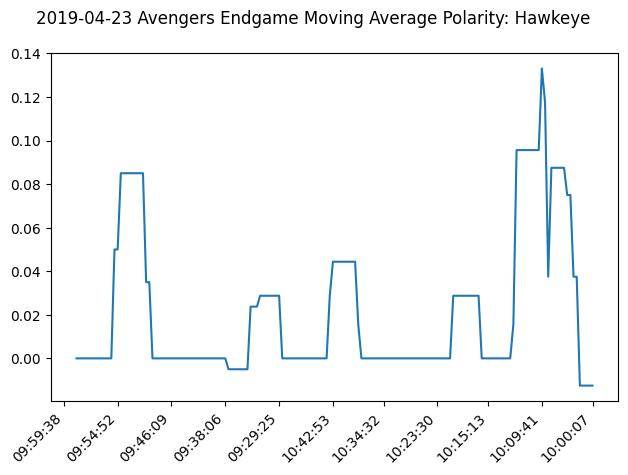

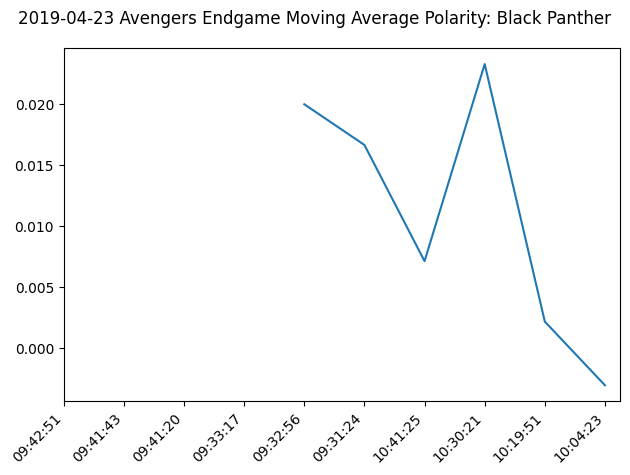

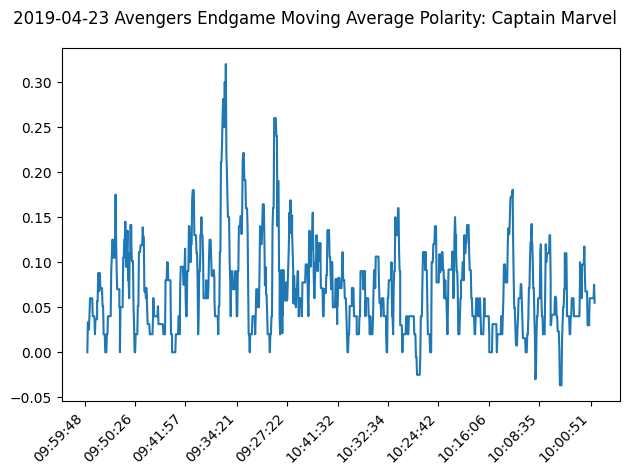

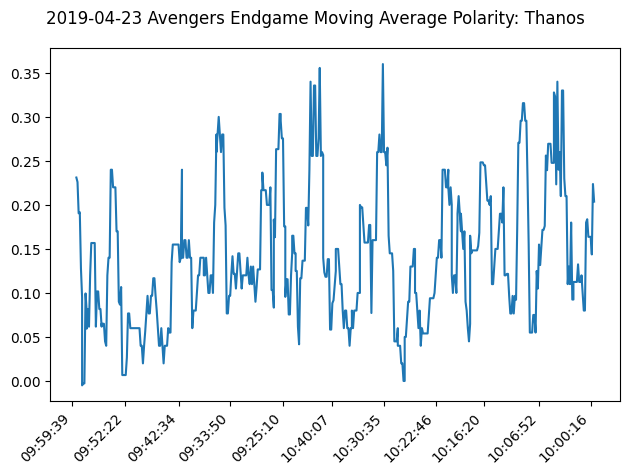

In [20]:
members = cast_sentiment_data.keys() # List of member names

# Plot moving average polarity for each cast member
for i, member in enumerate(members):
    cast_member = member  # Select the current cast member

    df_filtered = df[df[cast_member] == 1]  # Filter for tweets mentioning the cast member
    df_MA_Polarity = df_filtered[['timestamp', 'polarity']]
    df_MA_Polarity = df_MA_Polarity.sort_values(by='timestamp', ascending=False)
    df_MA_Polarity['MA Polarity'] = df_MA_Polarity['polarity'].rolling(10, min_periods=5).mean()  # Calculate moving average polarity
    n = len(df_filtered)
    xticks_to_show = df_MA_Polarity['timestamp'][::n // 10 if n >= 10 else n]  # Select tick locations for x-axis
    xtick_labels = [datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").time() for i in xticks_to_show] # Convert timestamp to time for x-axis labels
    
    # Plot the moving average polarity for the cast member
    plt.plot(df_MA_Polarity['timestamp'], df_MA_Polarity['MA Polarity'])
    plt.xticks(xticks_to_show, xtick_labels if xtick_labels else None)  # Set x-axis ticks and labels
    plt.xticks(rotation=45, ha='right')
    plt.suptitle("\n".join(["2019-04-23 Avengers Endgame Moving Average Polarity: " + member ]))
    plt.tight_layout()
    plt.show()


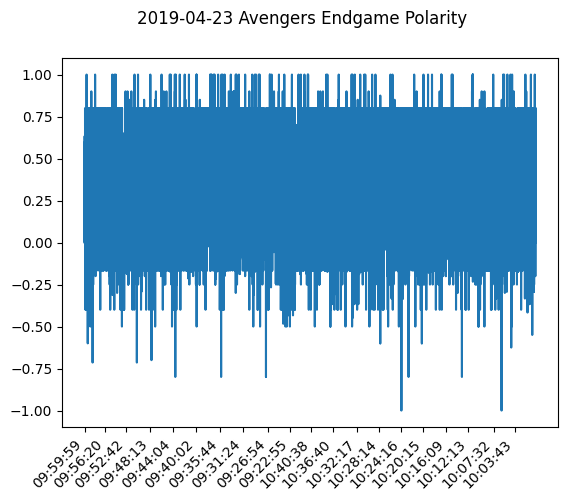

In [21]:
# Plot moving average polarity for all tweets
df_MA_Polarity_All = df[['timestamp','polarity']]
df_MA_Polarity_All = df_MA_Polarity_All.sort_values(by='timestamp', ascending=False)
df_MA_Polarity_All['MA Polarity'] = df_MA_Polarity_All.polarity.rolling(20, min_periods=5).mean() # Calculate moving average polarity for all tweets
n = len(df_MA_Polarity_All)
xticks_to_show = df_MA_Polarity_All['timestamp'][::n // 20 ]  # Select tick locations for x-axis
xtick_labels = [datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").time() for i in xticks_to_show] # Convert timestamp to time for x-axis labels

# Plot the moving average polarity for all tweets
plt.plot(df_MA_Polarity_All['timestamp'], df_MA_Polarity_All['polarity'])
plt.xticks(xticks_to_show, xtick_labels if xtick_labels else None)  # Set x-axis ticks and labels
plt.xticks(rotation=45, ha='right')
plt.suptitle("\n".join(["2019-04-23 Avengers Endgame Polarity"]))
plt.show()


In [22]:
# Generate word clouds for each cast member
from wordcloud import WordCloud
from collections import Counter

In [23]:
       
def generate_wordcloud(character, tweets, sentiment_dict=None):
    all_words = ' '.join(tweets) # Combine all tweets into a single string
    word_counts = Counter(all_words.split()) # Count word frequencies

    # Filter out low-frequency words
    threshold = 0.5
    word_counts = {word: count for word, count in word_counts.items() if count > threshold}

    # Generate and display the word cloud
    wordcloud = WordCloud(background_color="white", max_words=200, collocations=False, width=800, height=600, color_func=None).generate(all_words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"{character}'s Word Cloud")
    plt.show()


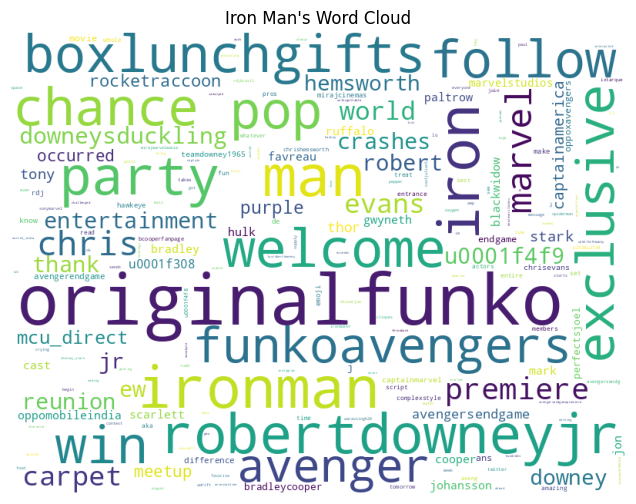

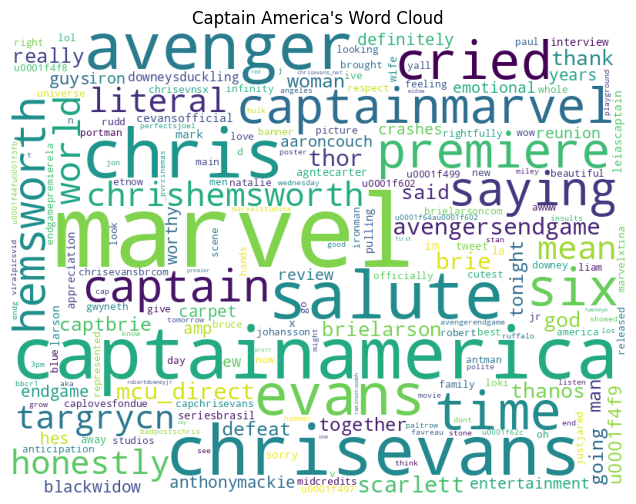

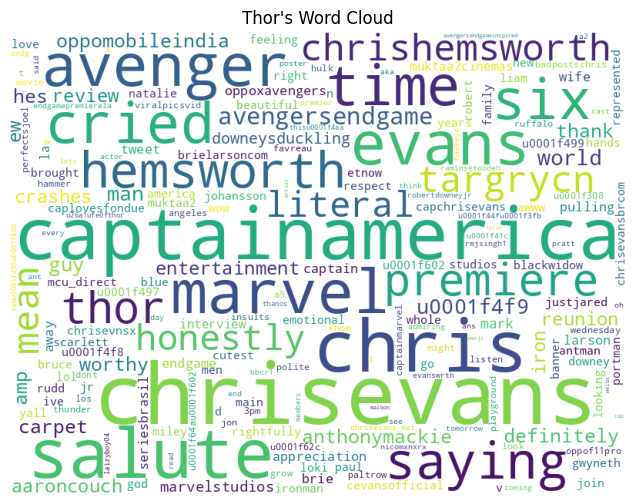

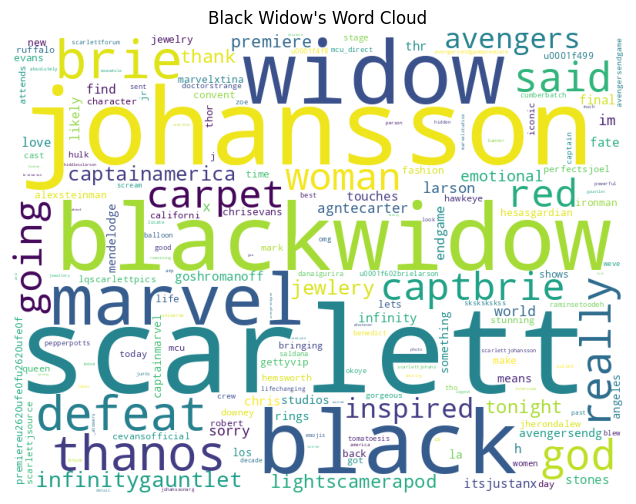

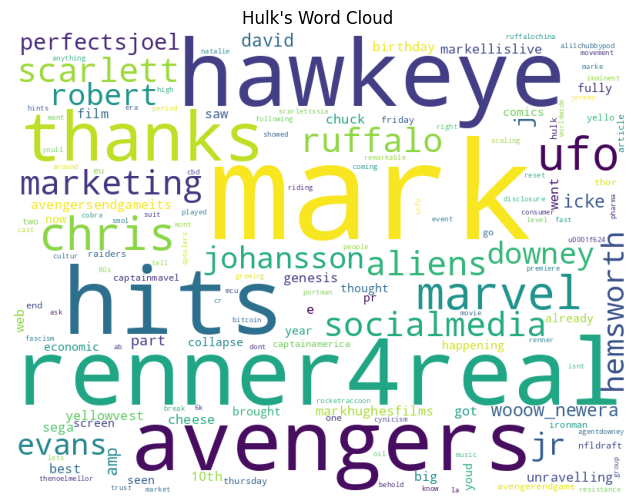

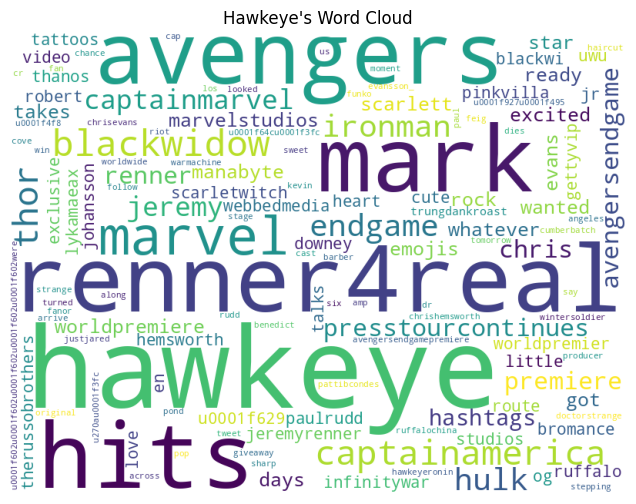

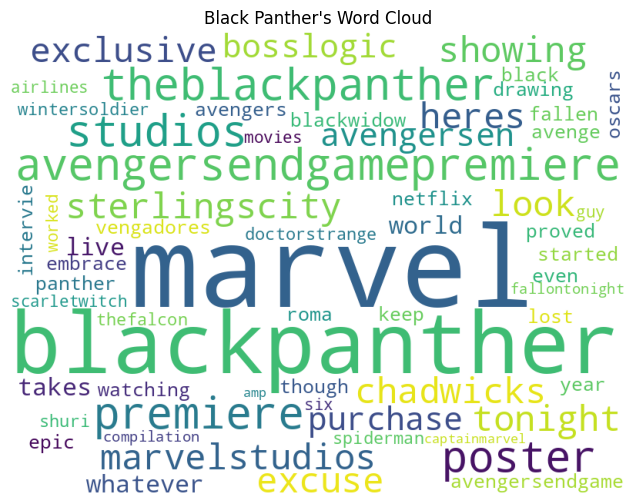

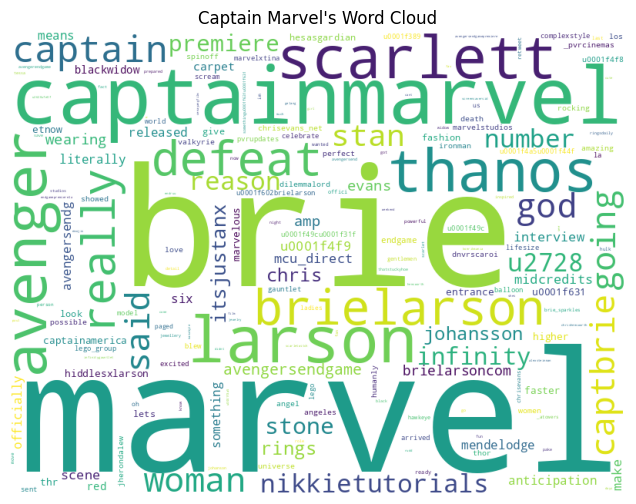

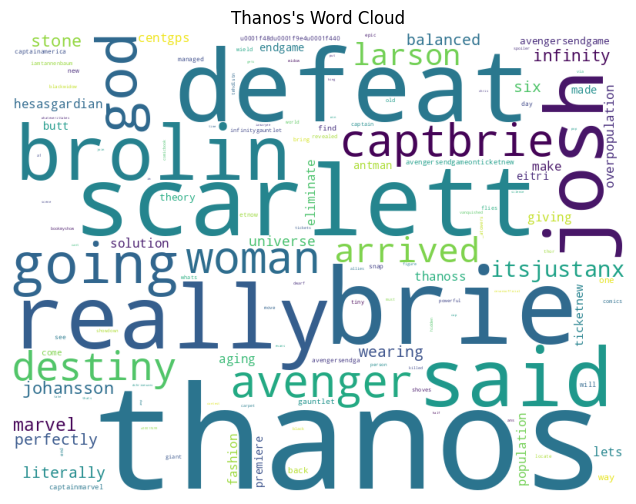

In [24]:
# Loop through each character in the 'members' list
for character in members:
    tweets = df[df[character] == 1]['Processed Tweet'] # Filter for tweets mentioning the cast member
    generate_wordcloud(character, tweets) # Generate a word cloud for the filtered tweets related to the current character
